# Initialize
Importing necessary packages

In [1]:
from pylab import *
import cartopy
import scipy
import numpy
import netCDF4
import numpy as np
import sys
import matplotlib
from matplotlib import colors, ticker
from matplotlib.colors import LogNorm
from matplotlib import pyplot as plt
from scipy import stats
from scipy import signal
from scipy.stats.stats import pearsonr

Import data

In [2]:
#data = 'C:/home/Aisawan/Documents/UKMS/cm1out.nc'
dataCQ = '../data/cm1out.nc'

In [4]:
#data_set = netCDF4.Dataset(data, "r")
data_set = netCDF4.Dataset(dataCQ, "r")

In [5]:
def get_dates(data_set):
    """Obtain `datetime.datetime` objects from the `'time'` axis of a NetCDF `DataSet`."""
    return netCDF4.num2date(data_set['time'][:], data_set['time'].units)

In [6]:
U = array(data_set.variables['uinterp'])    # radial velocity
V = array(data_set.variables['vinterp'])     # tangential velocity
W = array(data_set.variables['winterp'])    # vertical velocity
prs = array(data_set.variables['prs'])       # pressure (all vertical levels)
surf_prs = array(data_set.variables['sps'])  # surface pressure
rain_fall = array(data_set.variables['rain'])# suface accumulated rainfall
DH = array(data_set.variables['th9'])        # radial grid values
X = array(data_set.variables['ni'])          # radial grid values
Z = array(data_set.variables['nk'])          # vertical grid values
time = array(data_set.variables['time'])     # time

Reshaping data as necessary

In [7]:
# reshape 4-dim variable to 3-dim (t,z,x)
U_T = U.reshape(U.shape[0],U.shape[1],U.shape[3])
V_T = V.reshape(V.shape[0],V.shape[1],V.shape[3])
W_T = W.reshape(W.shape[0],W.shape[1],W.shape[3])
DH_T = DH.reshape(DH.shape[0],DH.shape[1],DH.shape[3])
prs_T = prs.reshape(prs.shape[0],prs.shape[1],prs.shape[3])
# reshape 3-dim to 2-dim
s_prs_T = surf_prs.reshape(surf_prs.shape[0],surf_prs.shape[2])
s_rain = rain_fall.reshape(rain_fall.shape[0],rain_fall.shape[2])

# change pressure to mb (millibars)
prs_mb = prs_T/100
s_prs_mb = s_prs_T/100

# Visualizing data 
Plot one time instance (day 25) of tangential wind profile

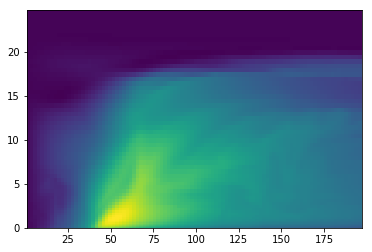

In [8]:
plt.pcolormesh(X[0:99],Z,V_T[100,:,0:99])

Plot minimum pressure and surface rainfall as a function of radius (day 10)

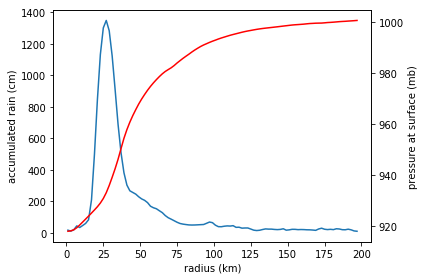

In [9]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('radius (km)')
ax1.set_ylabel('accumulated rain (cm)')
ax1.plot(X[0:99],s_rain[40,0:99])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure at surface (mb)')  # we already handled the x-label with ax1
ax2.plot(X[0:99],prs_mb[40,0,0:99],'r')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Extracting variables of interest
minimum tangential velocity (V_T), maximum vertical velocity (W_T), maximum diabatic heating (DH_T), minimum pressure (prs_mb), and minimum radial velocity (U_T)

days 10-120

In [10]:
t_len = 480
t_win = 440

time_test = time[40:t_len]/1440

prs_test = prs_mb[40:t_len,0,0:99]
V_test = V_T[40:t_len,:,0:99]
DH_test = DH_T[40:t_len,:,0:99]
W_test = W_T[40:t_len,:,0:99]
U_test = U_T[40:t_len,:,0:99]

prs_min = np.empty(t_win)
V_max = np.empty(t_win)
DH_max = np.empty(t_win)
W_max = np.empty(t_win)
U_min = np.empty(t_win)

for t in range(t_win):
    prs_min[t] = np.amin(prs_test[t,:])
    V_max[t] = np.amax(V_test[t,:,:])
    DH_max[t] = np.amax(DH_test[t,:,:])
    W_max[t] = np.amax(W_test[t,:,:])
    U_min[t] = np.amin(U_test[t,:,:])

Visualising as timeseries

Minimum surface pressure:

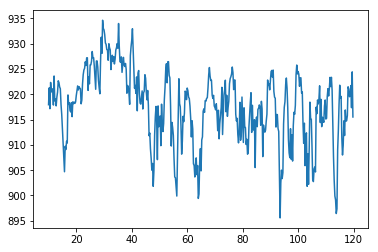

In [11]:
plt.plot(time_test,prs_min)

Maximum tangential wind:

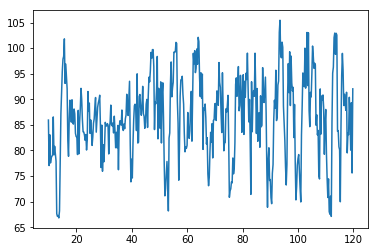

In [12]:
plt.plot(time_test,V_max)

Maximum vertical velocity:

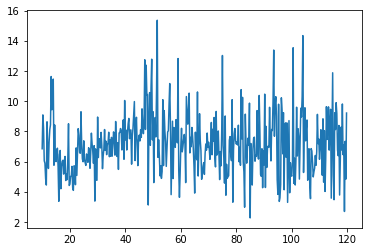

In [13]:
plt.plot(time_test,W_max)

Minimum radial velocity:

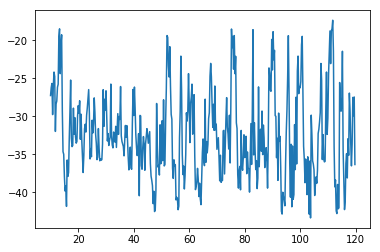

In [14]:
plt.plot(time_test,U_min)

Maximum diabatic heating:

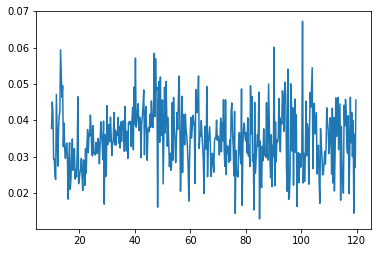

In [15]:
plt.plot(time_test,DH_max)

# Calculating correlations between variables of interest
Pearson correlations

In [16]:
VP_cor = stats.pearsonr(V_max,prs_min)
VU_cor = stats.pearsonr(V_max,U_min)
VW_cor = stats.pearsonr(V_max,W_max)
VDH_cor = stats.pearsonr(V_max,DH_max)
PU_cor = stats.pearsonr(prs_min,U_min)
PW_cor = stats.pearsonr(prs_min,W_max)
PDH_cor = stats.pearsonr(prs_min,DH_max)

print('V-Prs correlation = ', VP_cor)
print('V-U correlation = ', VU_cor)
print('V-W correlation = ', VW_cor)
print('V-DH correlation = ', VDH_cor)
print('Prs-U correlation = ', PU_cor)
print('Prs-W correlation = ', PW_cor)
print('Prs-DH correlation = ', PDH_cor)

V-Prs correlation =  (-0.7573749262490744, 4.237764419841814e-83)
V-U correlation =  (-0.9451681566459925, 5.434227007863881e-215)
V-W correlation =  (0.33916895989993984, 2.630285040954164e-13)
V-DH correlation =  (0.2995891437300438, 1.4149642109053766e-10)
Prs-U correlation =  (0.6284198361721139, 9.989555208182039e-50)
Prs-W correlation =  (-0.29050335788750886, 5.273037365182877e-10)
Prs-DH correlation =  (-0.2073463828682022, 1.1614382485337452e-05)


Scatter plot - V$_{max}$ vs. P$_{min}$

Text(92,930,'R = -0.757375')

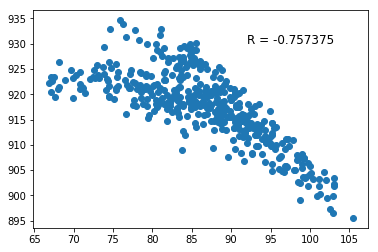

In [17]:
plt.scatter(V_max,prs_min)
text(92, 930, "R = %f" %VP_cor[0],fontsize=12)

Scatter plot - V$_{max}$ vs. U$_{min}$

Text(92,-20,'R = -0.945168')

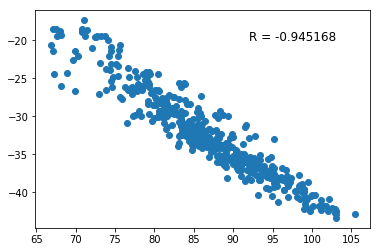

In [18]:
plt.scatter(V_max,U_min)
text(92, -20, "R = %f" %VU_cor[0],fontsize=12)

# Creating a multivariate regression model
Training period day 10-60

In [19]:
from pandas import DataFrame
import pandas as pd

Collect data

In [20]:
d = {'V_max': V_max[0:199], 'U_min': U_min[0:199], 'W_max': W_max[0:199], 
     'prs_min': prs_min[0:199],'DH_max': DH_max[0:199]}
df = pd.DataFrame(d)

In [21]:
df

,V_max,U_min,W_max,prs_min,DH_max
0,85.941147,-27.260708,6.854690,917.935730,0.037780
1,77.052422,-26.204096,9.096639,921.260132,0.045007
2,83.063721,-25.672197,8.190702,917.145691,0.042095
3,77.564087,-29.771513,6.053007,922.335449,0.029320
4,78.535095,-25.993757,5.894318,920.459778,0.029355
5,78.871742,-24.173426,4.860710,921.073364,0.024535
6,79.090950,-24.759785,4.450263,921.042480,0.023754
7,86.551865,-31.983940,8.639151,917.869141,0.047081
8,79.143730,-28.362873,6.953479,923.608521,0.037728
9,80.815605,-27.990435,5.548902,918.677368,0.027427


In [22]:
import statsmodels.formula.api as sm
lm = sm.ols(formula='V_max ~ U_min + W_max + prs_min + DH_max', data=df).fit()
print(lm.params)

Intercept    264.501552
U_min         -1.183452
W_max         -0.127570
prs_min       -0.234043
DH_max       -13.811426
dtype: float64


Regression model -
predictand: V$_{max}$, predictors: P$_{min}$, U$_{min}$, W$_{max}$, DH$_{max}$

In [23]:
#create dataframes
y = {'V_max': V_max[0:199]} 
df_y = pd.DataFrame(y)
x = {'U_min': U_min[0:199], 'W_max': W_max[0:199], 'prs_min': prs_min[0:199], 
     'DH_max': DH_max[0:199]}
df_x = pd.DataFrame(x)

In [24]:
import statsmodels.api as sm
df_x = sm.add_constant(df_x) ## let's add an intercept (beta_0) to our model

In [25]:
df1_x = df_x
model1 = sm.OLS(df_y, df1_x).fit() ## sm.OLS(output, input)
predictions1 = model1.predict(df1_x)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  V_max   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     695.8
Date:                Fri, 29 Jun 2018   Prob (F-statistic):          8.33e-114
Time:                        13:31:40   Log-Likelihood:                -395.36
No. Observations:                 199   AIC:                             800.7
Df Residuals:                     194   BIC:                             817.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        264.5016     21.392     12.364      0.000     222.310     306.693
U_min         -1.1835      0.032    -37.110      0.000      -1.246      -1.121
W_max         -0.1276      0.148     -0.862      0.390      -0.419       0.164
prs_min       -0.2340      0.023    -10.361      0.000      -0.279      -0.189
DH_max       -13.8114     34.187     -0.404      0.687     -81.238      53.615
==============================================================================
Omnibus:                       63.973   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.056
Skew:                          -1.139   Prob(JB):                     2.11e-67
Kurtosis:                       8.643   Cond. No.                     2.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regression model -
predictand: V$_{max}$, predictors: P$_{min}$, U$_{min}$

In [26]:
df2_x = pd.DataFrame(df_x, columns=['const','U_min','prs_min'])

In [27]:
model2 = sm.OLS(df_y, df2_x).fit() ## sm.OLS(output, input)
predictions2 = model2.predict(df2_x)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  V_max   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1354.
Date:                Fri, 29 Jun 2018   Prob (F-statistic):          1.79e-115
Time:                        13:32:03   Log-Likelihood:                -398.83
No. Observations:                 199   AIC:                             803.7
Df Residuals:                     196   BIC:                             813.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        256.4964     21.008     12.209      0.000     215.065     297.927
U_min         -1.1748      0.032    -36.649      0.000      -1.238      -1.112
prs_min       -0.2266      0.022    -10.217      0.000      -0.270      -0.183
==============================================================================
Omnibus:                       64.063   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.170
Skew:                          -1.165   Prob(JB):                     1.61e-63
Kurtosis:                       8.427   Cond. No.                     1.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regression model -
predictand: V$_{max}$, predictors: U$_{min}$

In [28]:
df3_x = pd.DataFrame(df_x, columns=['const','U_min'])

In [29]:
model3 = sm.OLS(df_y, df3_x).fit() ## sm.OLS(output, input)
predictions3 = model3.predict(df3_x)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  V_max   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1708.
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           5.13e-99
Time:                        13:32:16   Log-Likelihood:                -441.31
No. Observations:                 199   AIC:                             886.6
Df Residuals:                     197   BIC:                             893.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.0449      1.074     39.156      0.000      39.927      44.163
U_min         -1.3576      0.033    -41.330      0.000      -1.422      -1.293
==============================================================================
Omnibus:                       11.124   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               22.986
Skew:                          -0.173   Prob(JB):                     1.02e-05
Kurtosis:                       4.629   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression model -
predictand: P$_{min}$, predictors: U$_{min}$

In [30]:
df2_y = pd.DataFrame(df_x, columns=['prs_min'])

In [31]:
model4 = sm.OLS(df2_y, df3_x).fit() ## sm.OLS(output, input)
predictions = model4.predict(df3_x)
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                prs_min   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     89.08
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           1.11e-17
Time:                        13:32:21   Log-Likelihood:                -631.58
No. Observations:                 199   AIC:                             1267.
Df Residuals:                     197   BIC:                             1274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        946.4603      2.794    338.793      0.000     940.951     951.970
U_min          0.8066      0.085      9.438      0.000       0.638       0.975
==============================================================================
Omnibus:                       29.335   Durbin-Watson:                   0.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.479
Skew:                          -0.155   Prob(JB):                       0.0144
Kurtosis:                       2.038   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analysing Regression model

We choose to work with regression model 2: predictand V$_{max}$ and predictors U$_{min}$ and P$_{min}$

In [34]:
predictions2 = model2.predict(df2_x) #predicted value
VPre_cor = stats.pearsonr(V_max[0:199],predictions2) #R between observed and predicted values

In [35]:
#calculate RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(predictions2, V_max[0:199])
#print("rms error is: " + str(rmse_val))

Plot between observed and predicted values in Training period

Text(365,108,'RMSE = 1.795373')

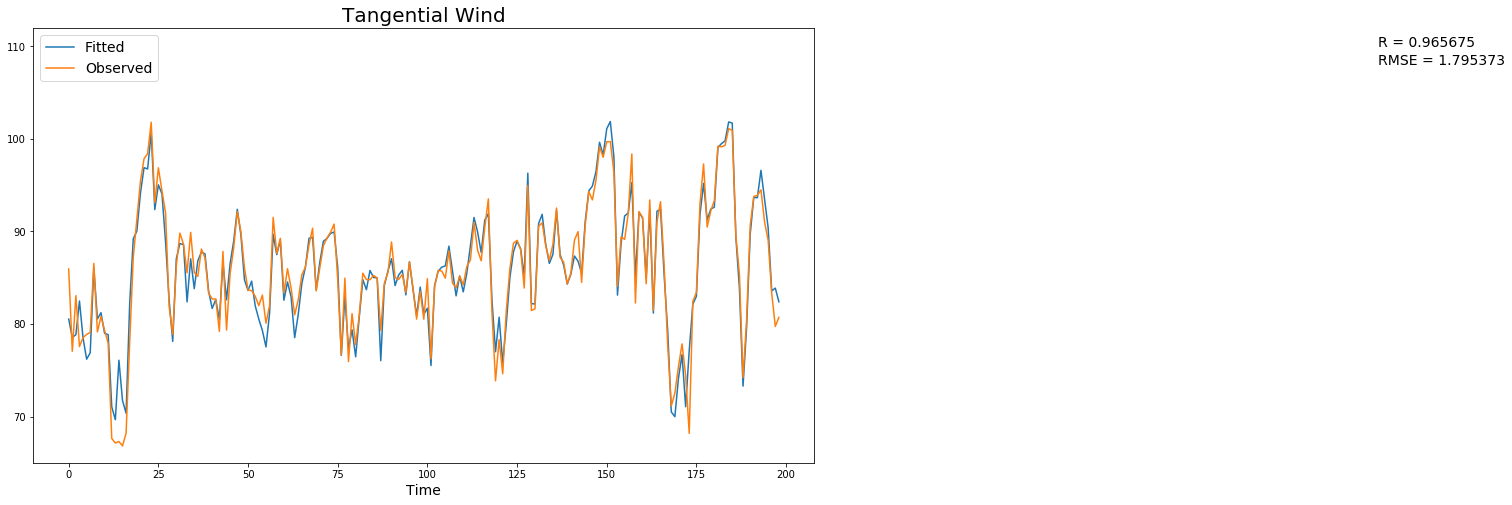

In [41]:
plt.figure(figsize = (14,8))
plt.title('Tangential Wind',fontsize=20)
plt.ylim((65,112))
plt.plot(predictions2, label = 'Fitted')
plt.plot(V_max[0:199], label = 'Observed')
legend(loc = 2, fontsize = 14)
plt.xlabel('Time', fontsize = 14)
text(365, 110, "R = %f" %VPre_cor[0], fontsize=14)
text(365, 108, "RMSE = %f" %rmse_val, fontsize=14)

# Verification period
minimum tangential velocity (V_T), maximum vertical velocity (W_T), maximum diabatic heating (DH_T), minimum pressure (prs_mb), and minimum radial velocity (U_T)

Days 61-120


In [47]:
t_st = 240
t_win = 240

time_test2 = time[t_st:t_len]/1440

prs_test2 = prs_mb[t_st:t_len,0,0:99]
V_test2 = V_T[t_st:t_len,:,0:99]
DH_test2 = DH_T[t_st:t_len,:,0:99]
W_test2 = W_T[t_st:t_len,:,0:99]
U_test2 = U_T[t_st:t_len,:,0:99]

prs_min2 = np.empty(t_win)
V_max2 = np.empty(t_win)
DH_max2 = np.empty(t_win)
W_max2 = np.empty(t_win)
U_min2 = np.empty(t_win)

for t in range(t_win):
    prs_min2[t] = np.amin(prs_test2[t,:])
    V_max2[t] = np.amax(V_test2[t,:,:])
    DH_max2[t] = np.amax(DH_test2[t,:,:])
    W_max2[t] = np.amax(W_test2[t,:,:])
    U_min2[t] = np.amin(U_test2[t,:,:])

Predicted values in verification period

In [48]:
x2 = {'U_min': U_min2, 'prs_min': prs_min2}
df_x2 = pd.DataFrame(x2)
df_x2 = sm.add_constant(df_x2) ## let's add an intercept (beta_0) to our model
x_predict = df_x2  # put the dates of which you want to predict kwh here
y_predict = model2.predict(x_predict)

Pearson correlation and RMSE

In [49]:
VPre_cor2 = stats.pearsonr(V_max2,y_predict) #R between observed and predicted value
rmse_val2 = rmse(V_max2,y_predict) #RMSE

Plot between observed and predicted values in verification period

Text(32,105,'RMSE = 2.180806')

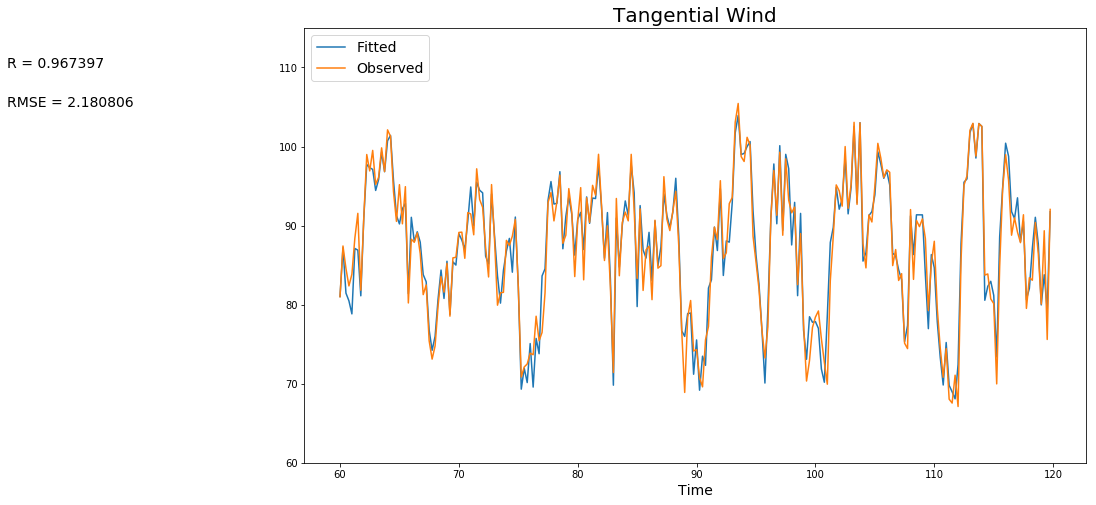

In [55]:
plt.figure(figsize = (14,8))
plt.title('Tangential Wind',fontsize=20)
plt.ylim((60,115))
plt.plot(time_test2,y_predict, label = 'Fitted')
plt.plot(time_test2,V_max2, label = 'Observed')
legend(loc = 2, fontsize = 14)
plt.xlabel('Time', fontsize = 14)
text(32, 110, "R = %f" %VPre_cor2[0], fontsize=14)
text(32, 105, "RMSE = %f" %rmse_val2, fontsize=14)

Computing error

In [52]:
err = y_predict-V_max2

(-20, 20)

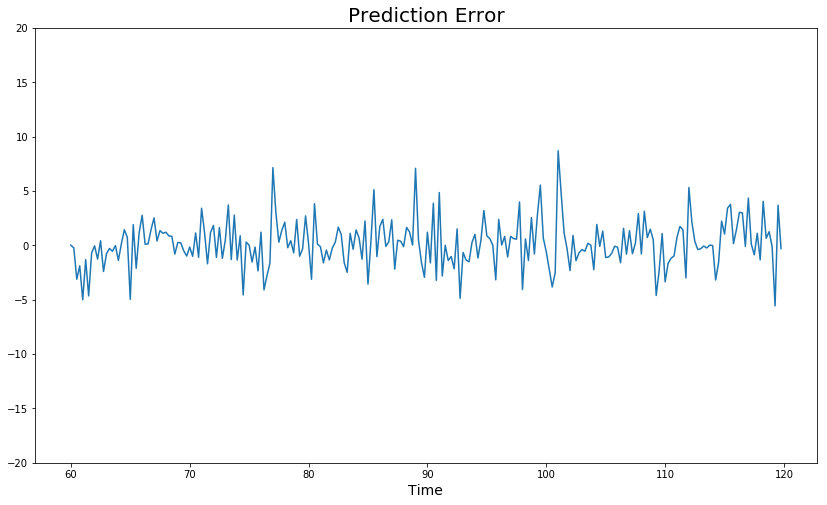

In [56]:
plt.figure(figsize = (14,8))
plt.title('Prediction Error',fontsize=20)
plt.plot(time_test2,err)
plt.xlabel('Time', fontsize = 14)
plt.ylim((-20,20))